In [1]:
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import utils
import torch.nn as nn
import torch.nn.functional as F
import os

import numpy as np

from PIL import Image
import glob
import time
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#tf.debugging.set_log_device_placement(True)

In [4]:
batch_size = 128
num_channels = 1
num_classes = 16
image_size = 112
latent_dim = 128

In [5]:
my_dir = os.getcwd()
train_dir=os.path.join(my_dir, '//image')
val_dir=os.path.join(my_dir, '//image')

In [6]:
print(my_dir)
print(train_dir+"\t||\t"+val_dir)

/home/npswml/Desktop/dongju/gen4test
//image	||	//image


In [7]:
image_list = []

def find_image_files_in_directory(directory_path):
    image_extensions = ["jpeg"]
    image_files = []
    label_lists =[]    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            
            if file.lower().endswith(tuple(image_extensions)):
                tmp = root.split("/")
                label_lists.append(tmp[-1])
                image_files.append(os.path.join(root, file))
                

    return image_files, label_lists

# 디렉토리 내의 모든 하위 디렉토리에서 이미지 파일을 검색합니다.
directory_path = my_dir
image_files, label_lists = find_image_files_in_directory(directory_path)



#print(glob.glob('*.jpeg'))

'''
for filename in glob.glob(train_dir+'/*/*.jpeg'):
    im = image.open(filename)
    image_list.append(im)
'''



"\nfor filename in glob.glob(train_dir+'/*/*.jpeg'):\n    im = image.open(filename)\n    image_list.append(im)\n"

In [8]:

np_img_list=[]
np_img_list0=[]
np_img_list1=[]
np_img_list2=[]
# 이미지 파일 리스트 출력 및 이미지 Into list + image resize
for image_file in image_files:
    #print(image_file)
    img = Image.open(image_file).convert("L")
    im = img.resize((image_size,image_size))
    image_list.append(im)
    np_img_list.append(np.asarray(im))
    np_img_list0.append(np.asarray(im))
    np_img_list1.append(np.asarray(im))
    #np_img_list2.append(np.asarray(im))

sangsaedo


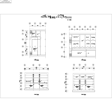

In [9]:
print(label_lists[2800])
image_list[2800]

In [10]:
numpydata = np.asarray(image_list, dtype=object)
np_images = np.array(image_list, dtype=object)

/tmp/ipykernel_64667/217983859.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  numpydata = np.asarray(image_list, dtype=object)
/tmp/ipykernel_64667/217983859.py:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(co

In [11]:
print(type(numpydata[3168]))
print(type(np_images[3168]))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


In [12]:
numpydata[3168].size

(112, 112)

In [13]:
print(np_images[0].size)
print(np_img_list[0].shape)

(112, 112)
(112, 112)


In [14]:
np_img_list[0]

array([[234, 244, 244, ..., 255, 255, 255],
       [248, 233, 215, ..., 255, 255, 255],
       [204, 205, 205, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
for iter in range(3169):
    np_img_list[iter] = np_img_list[iter].astype('float32')
    x = np_img_list[iter]
    np_img_list[iter] = (x-np.min(x))/(np.max(x)-np.min(x))
    np_img_list0[iter] = np.flip(np_img_list[iter],0)
    np_img_list1[iter] = np.flip(np_img_list[iter],1)

In [16]:
labels_list = np.array(label_lists)

In [17]:
np_img_list = np.concatenate((np_img_list,np_img_list0), axis=0)
np_img_list = np.concatenate((np_img_list,np_img_list1), axis=0)
tmp_list = labels_list
labels_list = np.concatenate((labels_list,labels_list), axis=0)
labels_list = np.concatenate((labels_list,tmp_list), axis=0)

In [18]:
np_img_list[2]

array([[0.8670886 , 0.93037975, 0.93037975, ..., 1.        , 1.        ,
        1.        ],
       [0.9556962 , 0.8607595 , 0.7468355 , ..., 1.        , 1.        ,
        1.        ],
       [0.6772152 , 0.6835443 , 0.6835443 , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [19]:
from collections import defaultdict

In [20]:
labels_list

data = labels_list
dic = defaultdict(int)
print(data)


['gyaetongdo' 'gyaetongdo' 'gyaetongdo' ... 'jickseondo' 'jickseondo'
 'jickseondo']


In [21]:
counter = 0

for val in data:
    if val not in dic: #if its a new entry add it to the dict and increase the counter
        #print(val, counter)
        dic[val] = counter
        counter+=1
        print(dic[val], val)
        #time.sleep(3)

0 gyaetongdo
1 pyeongmyundo
2 goosungdo
3 gigibaechido
4 Legends
5 layout
6 cable_wiring_diagram
7 Seonbunjang
8 poseoldo
9 sangsaedo
10 gaehwangdo
11 wiichido
12 domyunmokcha
13 gujomooldo
14 ganji
15 jickseondo


In [22]:
labels = [dic[x] for x in data]

In [23]:
labels_tmp = torch.tensor(labels)

In [24]:
labels_tmp.shape

torch.Size([9507])

In [25]:
print(np_img_list.shape)
img = np.reshape(np_img_list, (-1,1,image_size,image_size))
all_labels = labels_tmp



(9507, 112, 112)


In [26]:
all_labels.shape

torch.Size([9507])

In [27]:
img.shape

(9507, 1, 112, 112)

In [28]:
img = torch.tensor(img)

In [29]:
all_labels = torch.tensor(all_labels)

/tmp/ipykernel_64667/3082215221.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_labels = torch.tensor(all_labels)


In [30]:
dataset = TensorDataset(img, all_labels)

In [31]:
train_loader = DataLoader(dataset, batch_size=128, shuffle=True)
print(len(train_loader))

75


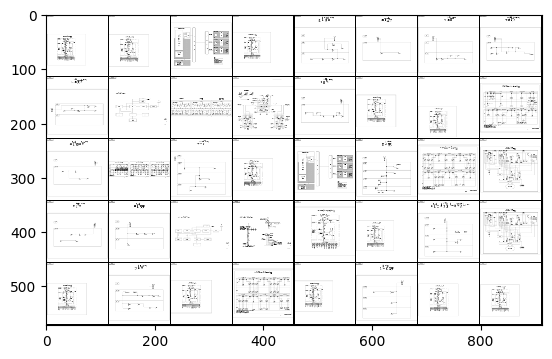

In [32]:
img_grid = utils.make_grid(img[:40], ncol=8, padding=2)
def show(img):
    img = img.numpy() # Tensor -> numpy array
    img = img.transpose([1,2,0]) # C x H x W -> H x W x C
    plt.imshow(img, interpolation='nearest')
show(img_grid)

In [33]:
# set parameters
params = {
    'num_classes':16,
    'nz':100,
    'input_size':(1,112,112)
}

In [34]:
class Generator(nn.Module):
    
    def __init__(self, params):
        super().__init__()
        self.num_classes = params['num_classes']
        self.nz = params['nz'] # 노이즈 수
        self.input_size = params['input_size'] # (1,28,28
        
        # Noise와 label을 결합하는 용도인 label embedding matrix를 생성
        self.label_emb = nn.Embedding(self.num_classes, self.num_classes)
        
        # Generator
        self.gen = nn.Sequential(
            nn.Linear(self.nz + self.num_classes, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512,1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024,int(np.prod(self.input_size))),
            nn.Tanh()
        )
        
    def forward(self, noise, labels):
        # noise와 label의 결합
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        x = self.gen(gen_input)
        x = x.view(x.size(0), *self.input_size)
        return x
    
# check
x = torch.randn(16,100,device=device) # 노이즈
label = torch.randint(0,16,(16,),device=device)
model_gen = Generator(params).to(device)
out_gen = model_gen(x,label) # 가짜 이미지 생성
print(out_gen.shape)

torch.Size([16, 1, 112, 112])


In [35]:
class Discriminator(nn.Module):
    
     def __init__(self, params):
        super().__init__()
        self.input_size = params['input_size']
        self.num_classes = params['num_classes']
        self.label_embedding = nn.Embedding(self.num_classes, self.num_classes)
        self.dis = nn.Sequential(
            nn.Linear(self.num_classes+int(np.prod(self.input_size)),512),
            nn.LeakyReLU(0.2),
            nn.Linear(512,512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2),
            nn.Linear(512,512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2),
            nn.Linear(512,1),
            nn.Sigmoid()
        )
        
     def forward(self, img, labels):
        # 이미지와 label 결합
        dis_input = torch.cat((img.view(img.size(0),-1),self.label_embedding(labels)),-1)
        x = self.dis(dis_input)
        return x
    
# check
x = torch.randn(16,1,112,112,device=device)
label = torch.randint(0,16,(16,), device=device)
model_dis = Discriminator(params).to(device)
out_dis = model_dis(x,label)
print(out_dis.shape)

torch.Size([16, 1])


In [36]:
# 가중치 초기화
def initialize_weights(model):
    classname = model.__class__.__name__
    # fc layer
    if classname.find('Linear') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)
        nn.init.constant_(model.bias.data, 0)
    # batchnorm
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(model.weight.data, 1.0, 0.02)
        nn.init.constant_(model.bias.data, 0)

# 가중치 초기화 적용
model_gen.apply(initialize_weights);
model_dis.apply(initialize_weights);

In [37]:
# 손실 함수
loss_func = nn.BCELoss() 

from torch import optim

lr = 3e-6
beta1 = 0.5
beta2 = 0.999

# optimization
opt_dis = optim.Adam(model_dis.parameters(), lr=lr, betas=(beta1,beta2)) # Discrminator
opt_gen = optim.Adam(model_gen.parameters(), lr=lr, betas=(beta1,beta2)) # Generator

# 학습 파라미터
nz = params['nz'] # Noise vector initialize
num_epochs = 50000

loss_history={'gen':[],
              'dis':[]}

In [38]:
# Train
batch_count = 0
start_time = time.time()
model_dis.train()
model_gen.train()

for epoch in range(num_epochs):
    for xb, yb in train_loader:
        ba_si = xb.shape[0]
        
        xb = xb.to(device)
        yb = yb.to(device)
        yb_real = torch.Tensor(ba_si, 1).fill_(1.0).to(device) # real_label
        yb_fake = torch.Tensor(ba_si, 1).fill_(0.0).to(device) # fake_label
        
        # Genetator
        model_gen.zero_grad()
        noise = torch.randn(ba_si,100).to(device) # 노이즈 생성
        gen_label = torch.randint(0,16,(ba_si,)).to(device) # label 생성

         # 가짜 이미지 생성
        out_gen = model_gen(noise, gen_label)

        # 가짜 이미지 판별
        out_dis = model_dis(out_gen, gen_label)

        loss_gen = loss_func(out_dis, yb_real)
        loss_gen.backward()
        opt_gen.step()

        # Discriminator
        model_dis.zero_grad()
        
        # 진짜 이미지 판별
        out_dis = model_dis(xb, yb)
        loss_real = loss_func(out_dis, yb_real)

        # 가짜 이미지 판별
        out_dis = model_dis(out_gen.detach(),gen_label)
        loss_fake = loss_func(out_dis,yb_fake)

        loss_dis = (loss_real + loss_fake) / 2
        loss_dis.backward()
        opt_dis.step()

        loss_history['gen'].append(loss_gen.item())
        loss_history['dis'].append(loss_dis.item())

        batch_count += 1
        if batch_count % 1000 == 0:
            print('Epoch: %.0f, G_Loss: %.6f, D_Loss: %.6f, time: %.2f min' %(epoch, loss_gen.item(), loss_dis.item(), (time.time()-start_time)/60))

Epoch: 13, G_Loss: 0.838526, D_Loss: 0.305986, time: 0.27 min
Epoch: 26, G_Loss: 1.581772, D_Loss: 0.157353, time: 0.55 min
Epoch: 39, G_Loss: 1.658033, D_Loss: 0.310835, time: 0.83 min
Epoch: 53, G_Loss: 1.221949, D_Loss: 0.324791, time: 1.11 min
Epoch: 66, G_Loss: 1.487082, D_Loss: 0.261869, time: 1.38 min
Epoch: 79, G_Loss: 1.716754, D_Loss: 0.198667, time: 1.66 min
Epoch: 93, G_Loss: 2.293927, D_Loss: 0.112847, time: 1.93 min
Epoch: 106, G_Loss: 2.798079, D_Loss: 0.168981, time: 2.21 min
Epoch: 119, G_Loss: 2.299045, D_Loss: 0.102640, time: 2.48 min
Epoch: 133, G_Loss: 3.088663, D_Loss: 0.142935, time: 2.75 min
Epoch: 146, G_Loss: 2.427156, D_Loss: 0.104715, time: 3.03 min
Epoch: 159, G_Loss: 3.149202, D_Loss: 0.045027, time: 3.30 min
Epoch: 173, G_Loss: 3.219451, D_Loss: 0.085808, time: 3.57 min
Epoch: 186, G_Loss: 3.160474, D_Loss: 0.087022, time: 3.85 min
Epoch: 199, G_Loss: 2.943111, D_Loss: 0.081075, time: 4.11 min
Epoch: 213, G_Loss: 3.103981, D_Loss: 0.170380, time: 4.39 min

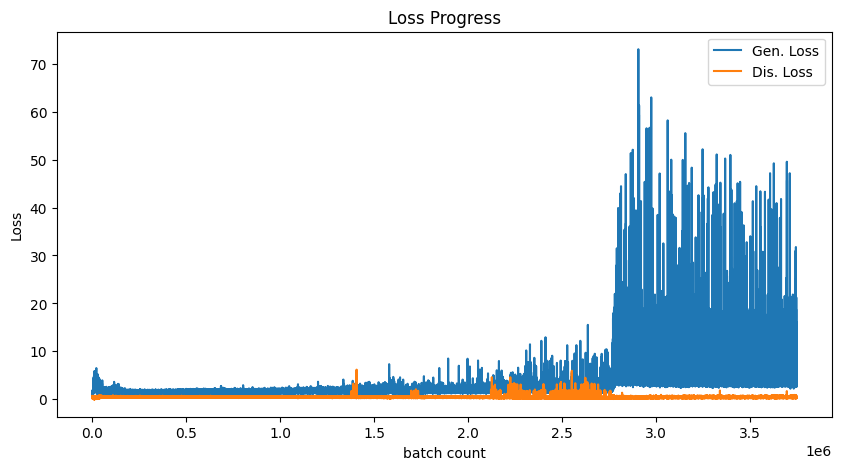

In [39]:
# plot loss history
plt.figure(figsize=(10,5))
plt.title('Loss Progress')
plt.plot(loss_history['gen'], label='Gen. Loss')
plt.plot(loss_history['dis'], label='Dis. Loss')
plt.xlabel('batch count')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
path2models = './models/'
os.makedirs(path2models, exist_ok=True)
path2weights_gen = os.path.join(path2models, 'weights_gen.pt')
path2weights_dis = os.path.join(path2models, 'weights_dis.pt')

torch.save(model_gen.state_dict(), path2weights_gen)
torch.save(model_dis.state_dict(), path2weights_dis)

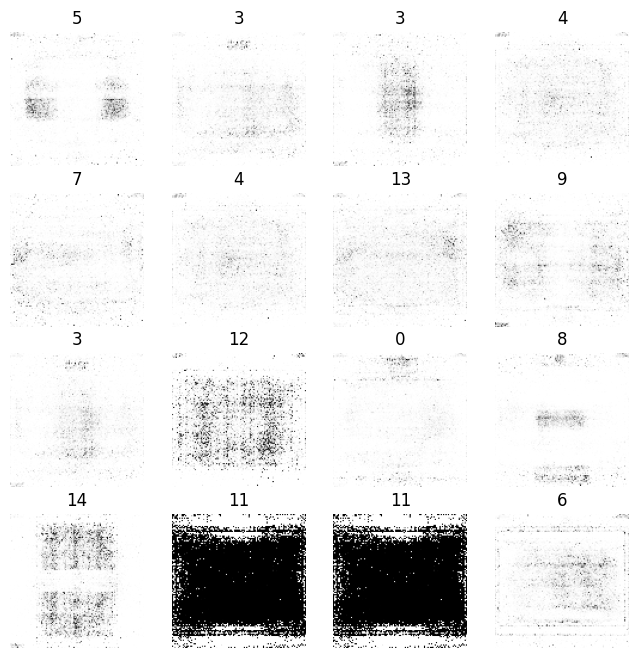

In [42]:
# 가중치 불러오기
weights = torch.load(path2weights_gen)
model_gen.load_state_dict(weights)

# evalutaion mode
model_gen.eval()

# fake image 생성
with torch.no_grad():
    fig = plt.figure(figsize=(8,8))
    cols, rows = 4, 4 # row와 col 갯수
    for i in range(rows * cols):
        fixed_noise = torch.randn(16, 100, device=device)
        label = torch.randint(0,16,(16,), device=device)
        img_fake = model_gen(fixed_noise, label).detach().cpu()
        fig.add_subplot(rows, cols, i+1)
        plt.title(label[i].item())
        plt.axis('off')
        plt.imshow(img_fake[i].squeeze(), cmap='gray')
plt.show()

In [45]:
'''
0 gyaetongdo
1 pyeongmyundo
2 goosungdo
3 gigibaechido
4 Legends
5 layout
6 cable_wiring_diagram
7 Seonbunjang
8 poseoldo
9 sangsaedo
10 gaehwangdo
11 wiichido
12 domyunmokcha
13 gujomooldo
14 ganji
15 jickseondo
'''

'\n0 gyaetongdo\n1 pyeongmyundo\n2 goosungdo\n3 gigibaechido\n4 Legends\n5 layout\n6 cable_wiring_diagram\n7 Seonbunjang\n8 poseoldo\n9 sangsaedo\n10 gaehwangdo\n11 wiichido\n12 domyunmokcha\n13 gujomooldo\n14 ganji\n15 jickseondo\n'